In [4]:
import pandas as pd

df=pd.read_csv("../data/wine/wine.data")

df.columns=[
        "Classe", "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium",
        "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
        "Color_intensity", "Hue", "0D280_0D315_of_diluted_wines", "Proline"
]
print("Apperçu des 10 premieres lignes")
print(df.head(10))

Apperçu des 10 premieres lignes
   Classe  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0       1    13.20       1.78  2.14               11.2        100   
1       1    13.16       2.36  2.67               18.6        101   
2       1    14.37       1.95  2.50               16.8        113   
3       1    13.24       2.59  2.87               21.0        118   
4       1    14.20       1.76  2.45               15.2        112   
5       1    14.39       1.87  2.45               14.6         96   
6       1    14.06       2.15  2.61               17.6        121   
7       1    14.83       1.64  2.17               14.0         97   
8       1    13.86       1.35  2.27               16.0         98   
9       1    14.10       2.16  2.30               18.0        105   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.8

In [5]:
#comprehension du jeu de données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classe                        177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malicacid                     177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity_of_ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total_phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid_phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color_intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  0D280_0D315_of_diluted_wines  177 non-null    float64
 13  Proli

In [6]:
#Statistique descriptive de nos données
print(df.describe())

           Classe     Alcohol   Malicacid         Ash  Alcalinity_of_ash  \
count  177.000000  177.000000  177.000000  177.000000         177.000000   
mean     1.943503   12.993672    2.339887    2.366158          19.516949   
std      0.773991    0.808808    1.119314    0.275080           3.336071   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.360000    1.600000    2.210000          17.200000   
50%      2.000000   13.050000    1.870000    2.360000          19.500000   
75%      3.000000   13.670000    3.100000    2.560000          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
count  177.000000     177.000000  177.000000            177.000000   
mean    99.587571       2.292260    2.023446              0.362316   
std     14.174018       0.626465    0.998658              0.124653   
min     70.000000       0.980000   

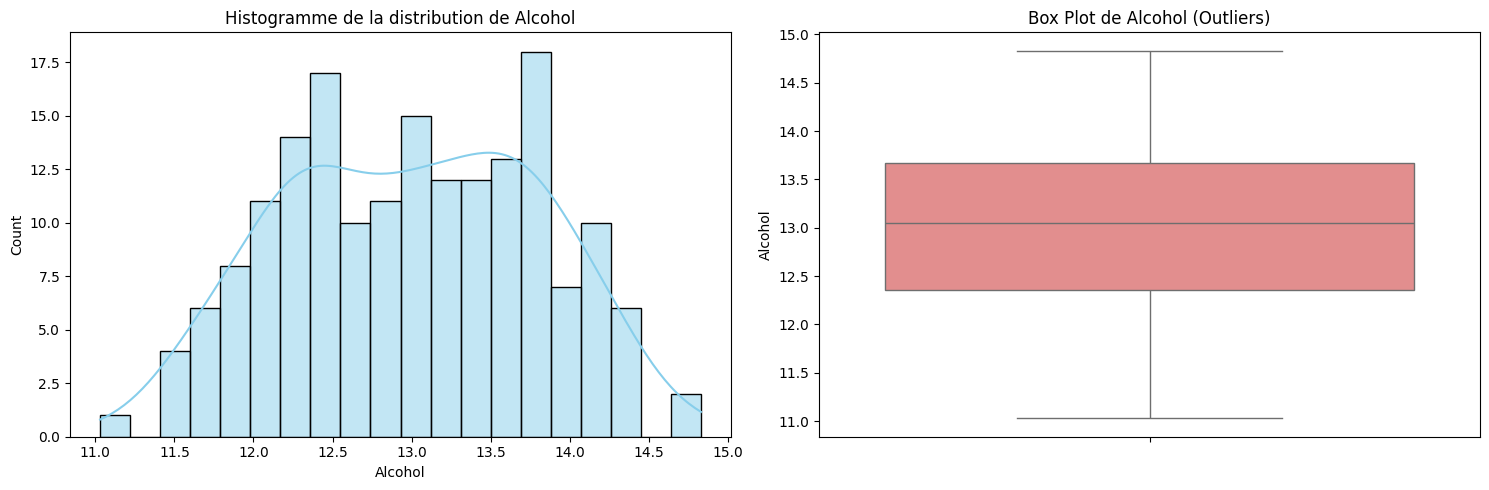

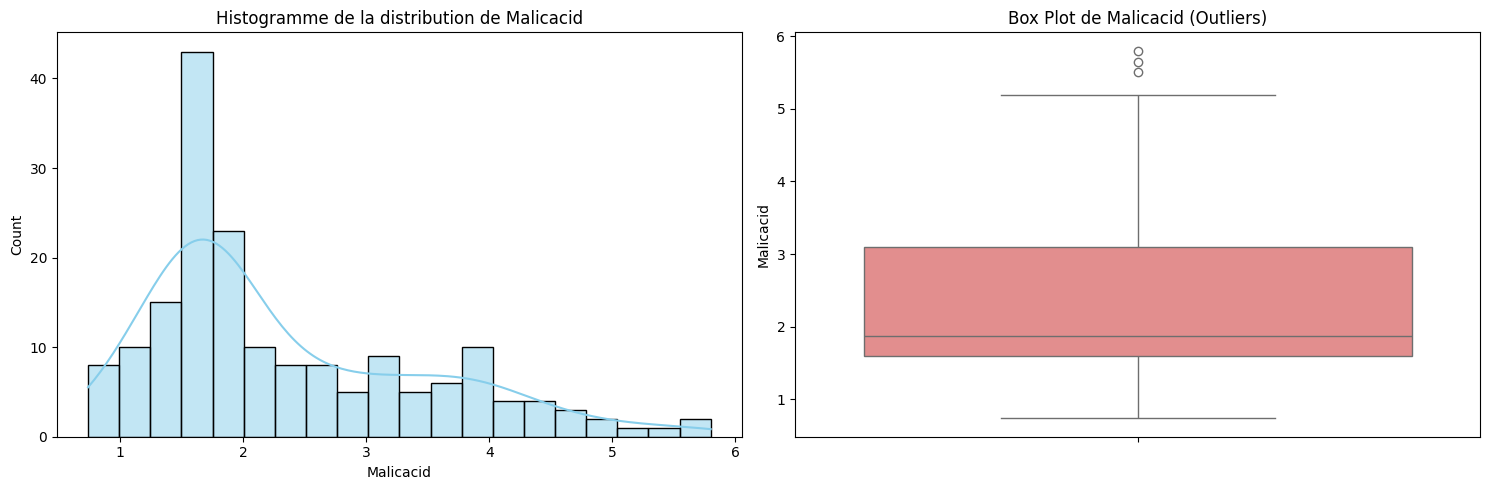

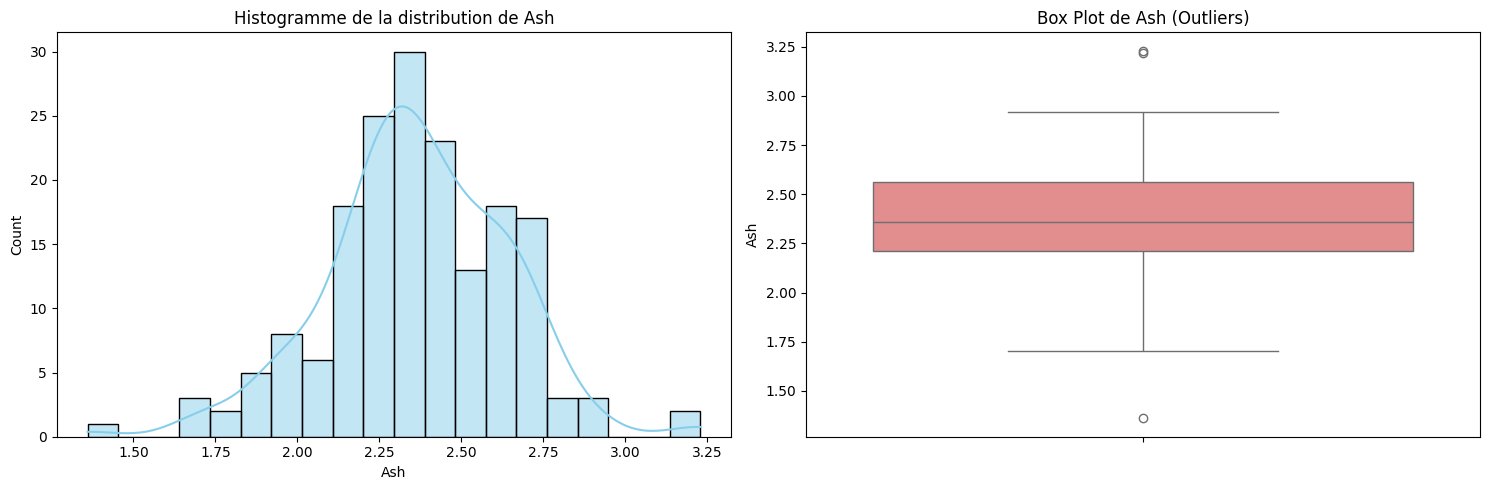

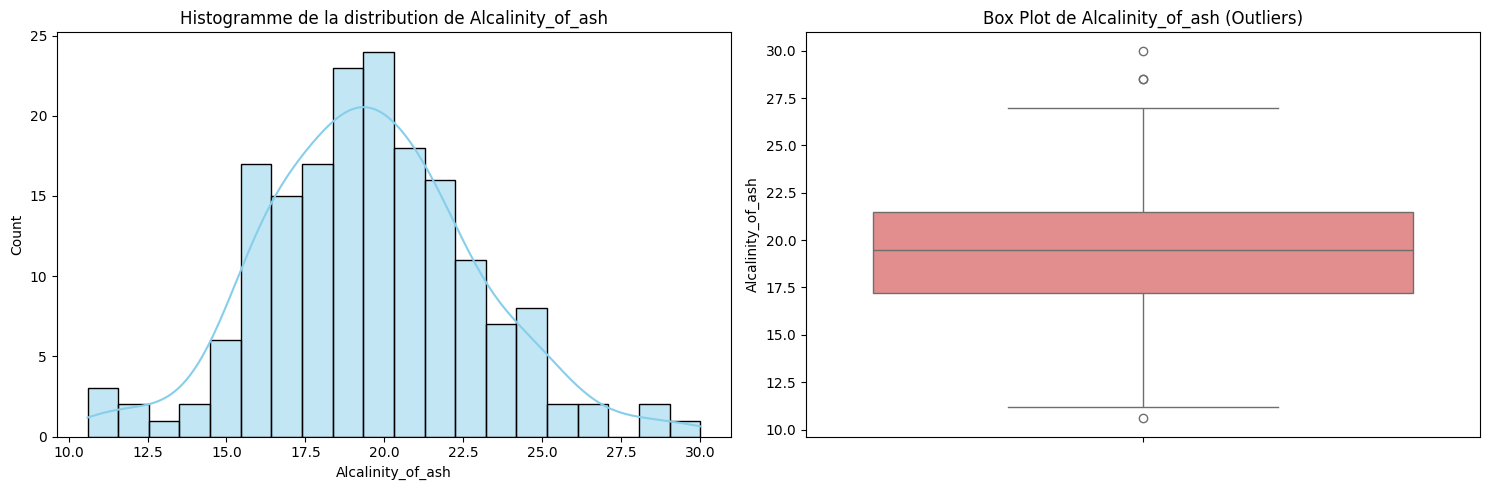

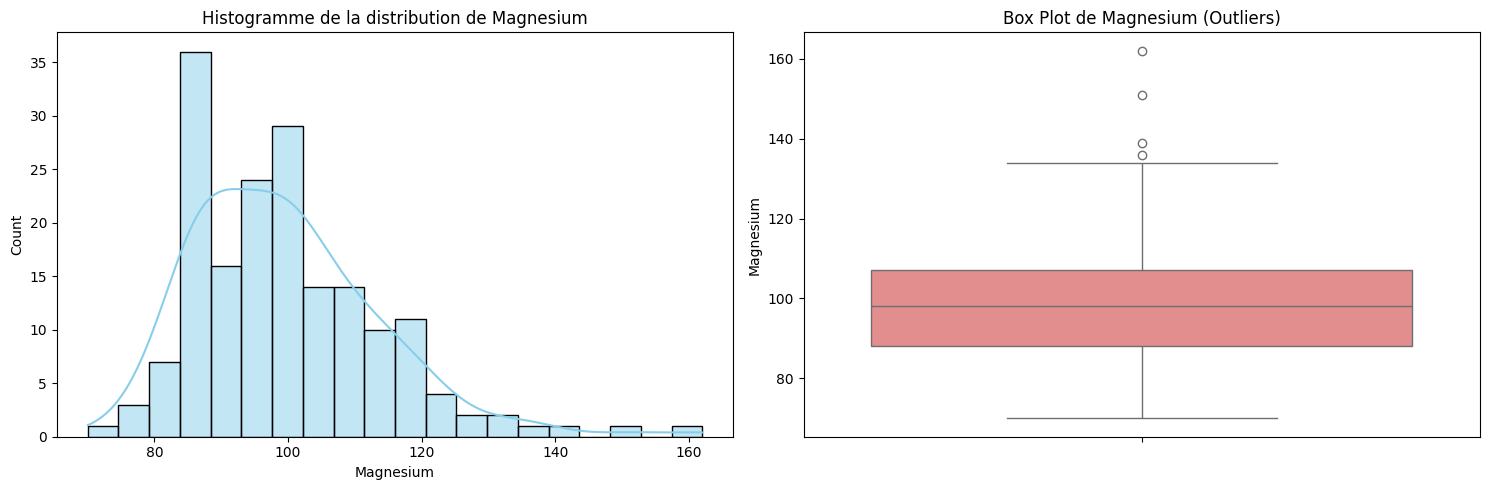

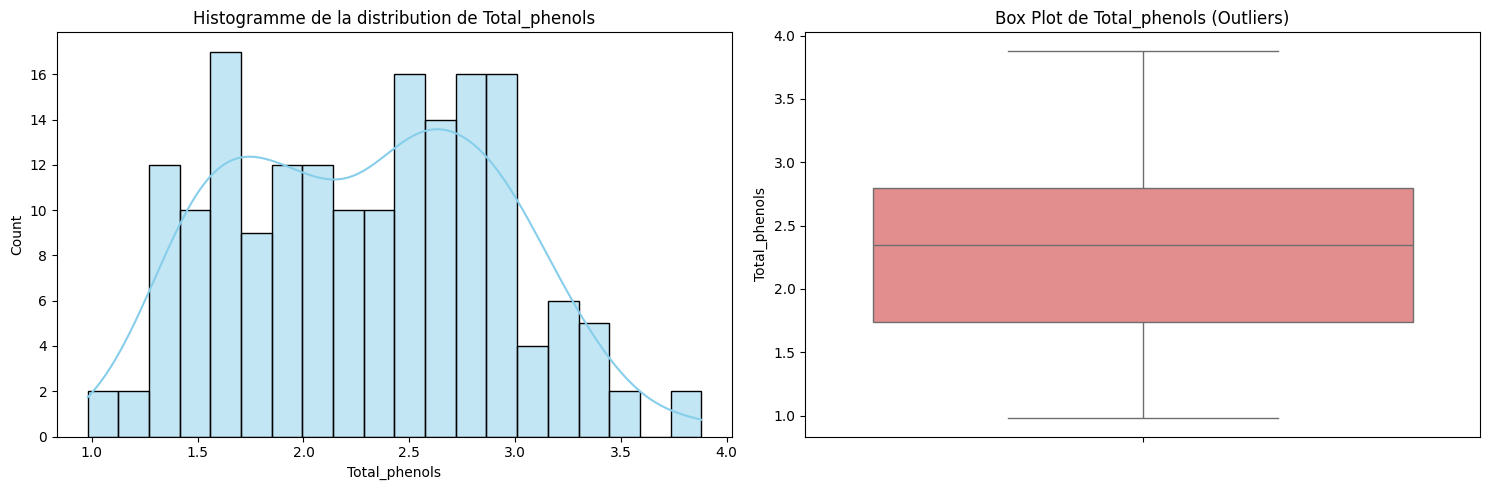

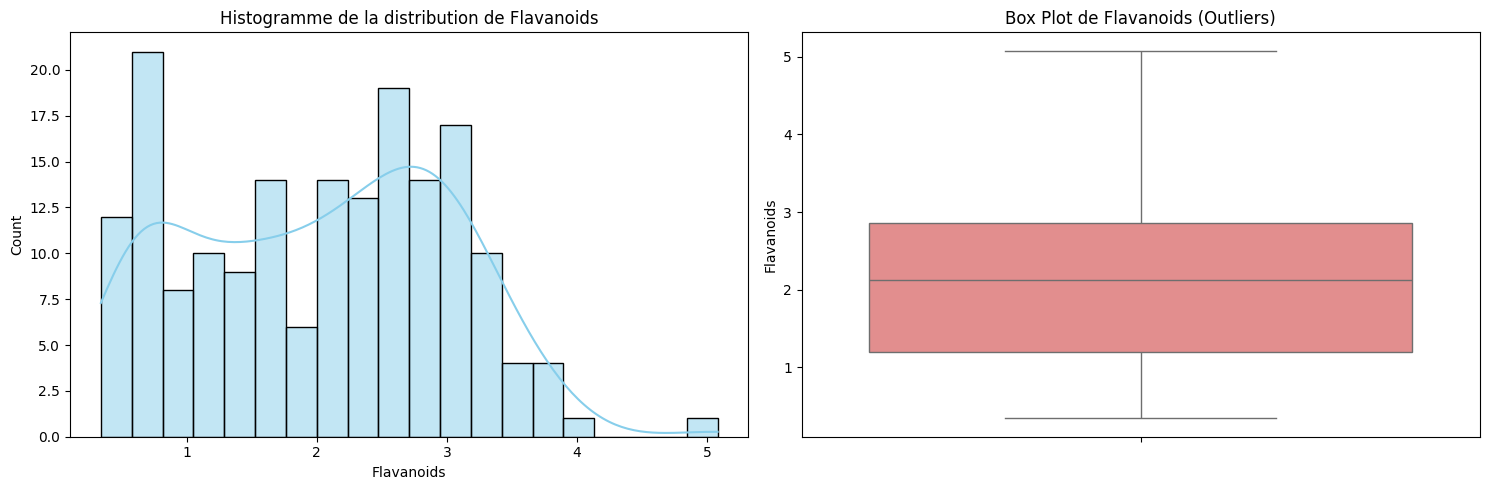

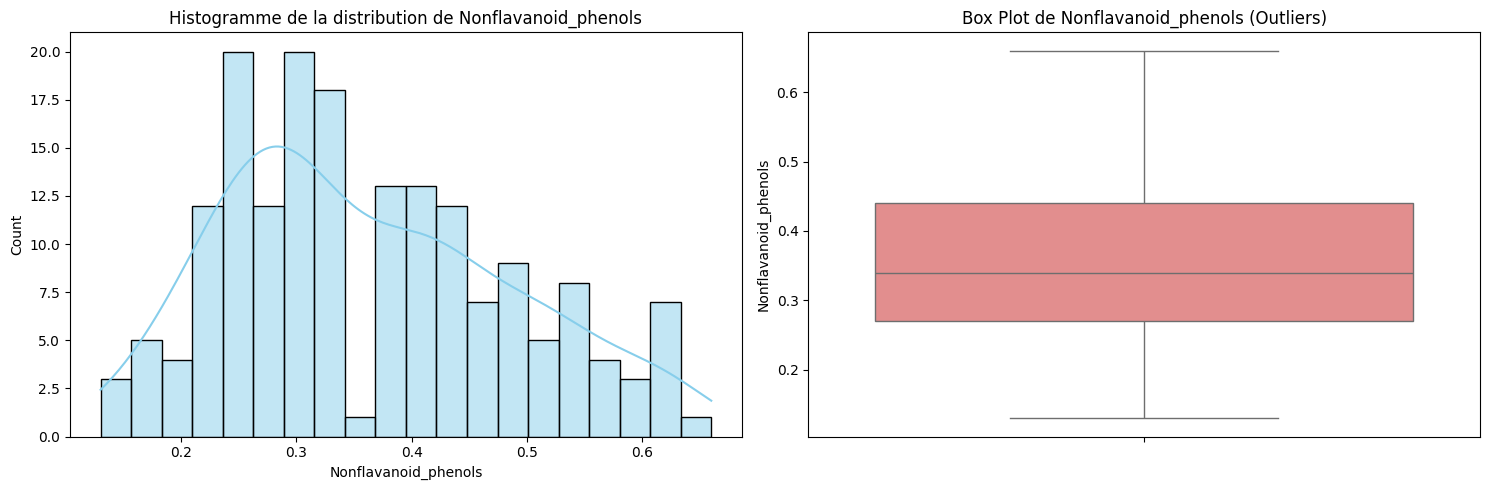

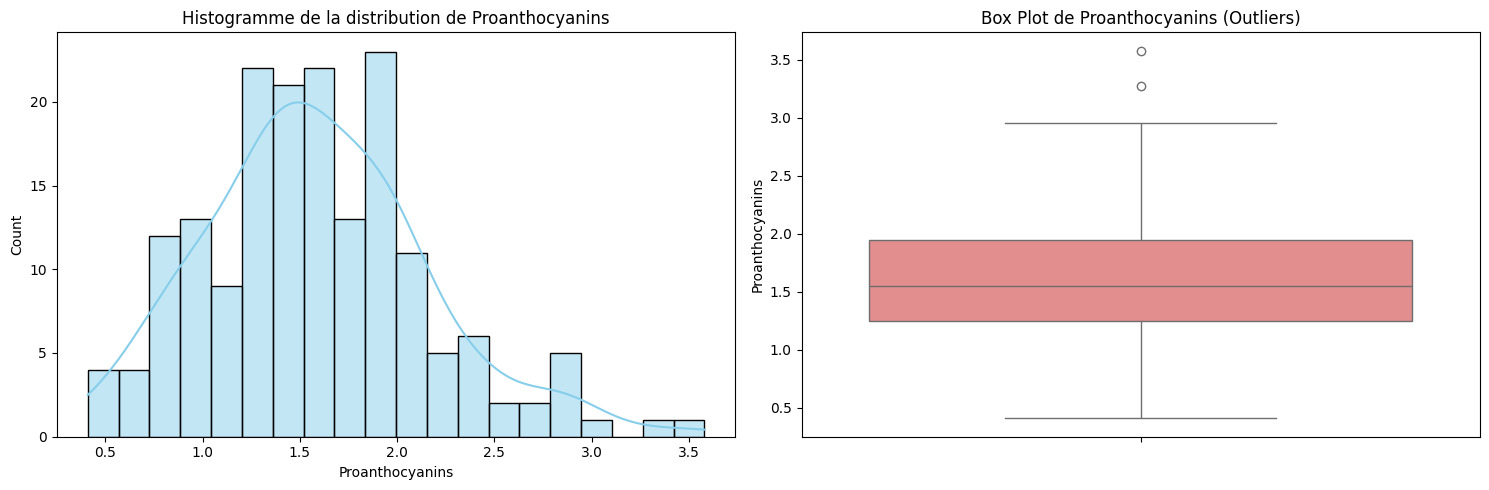

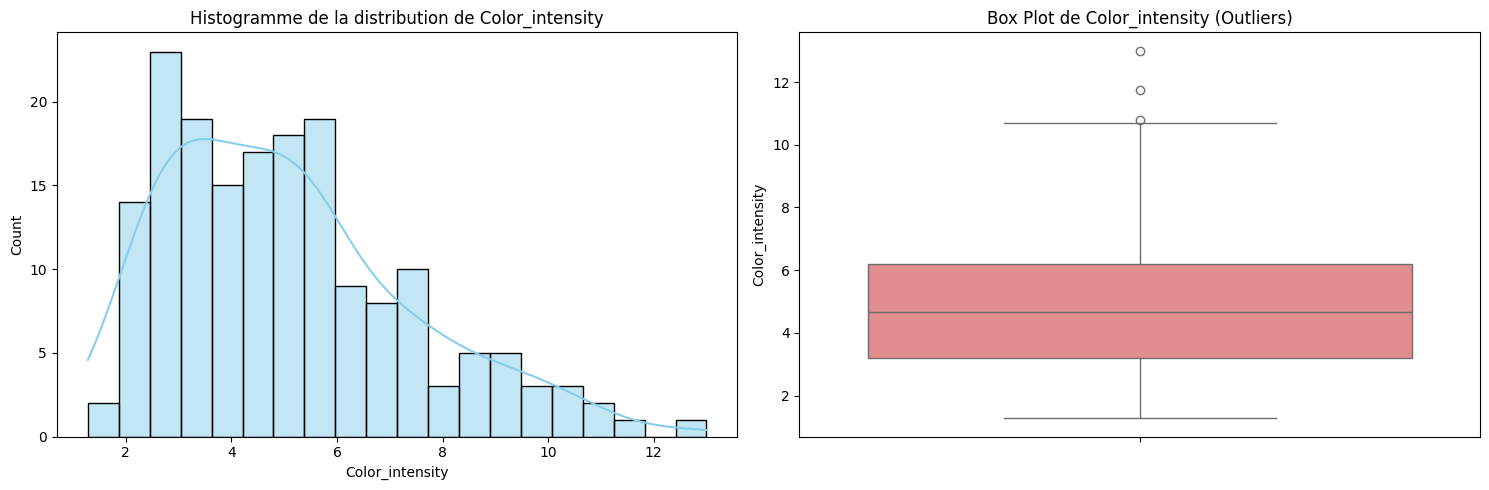

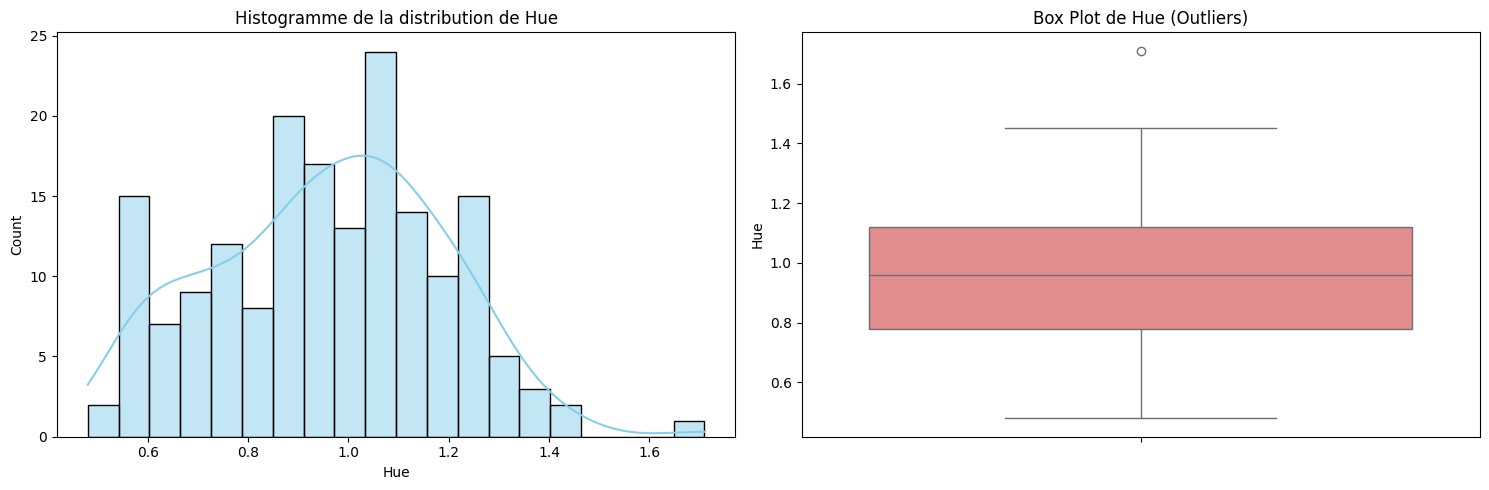

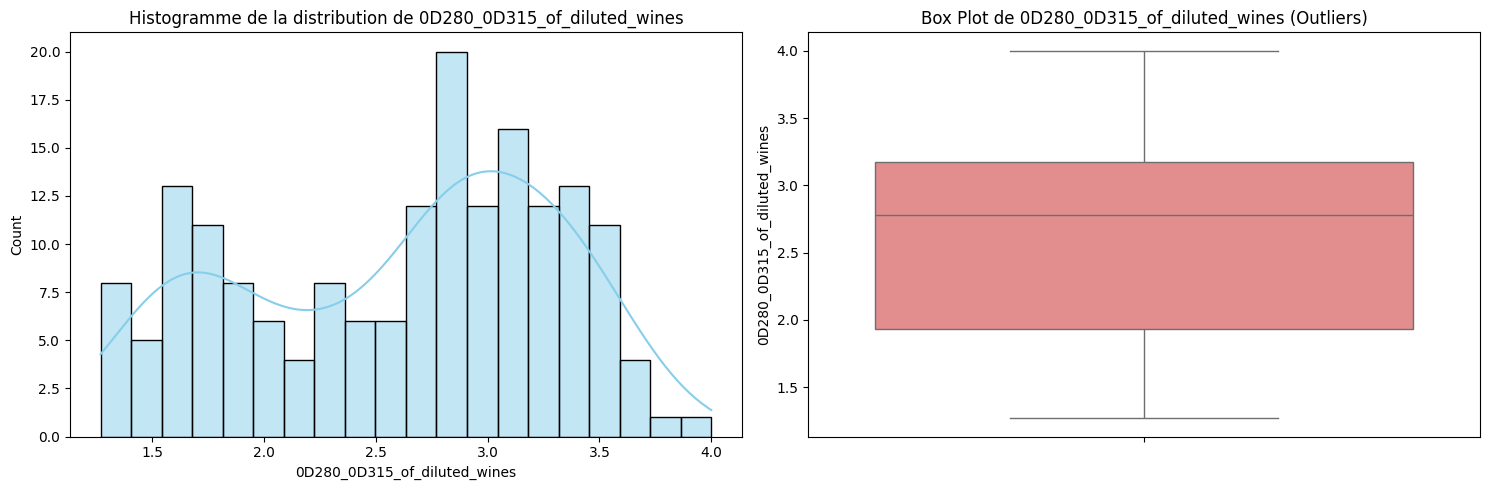

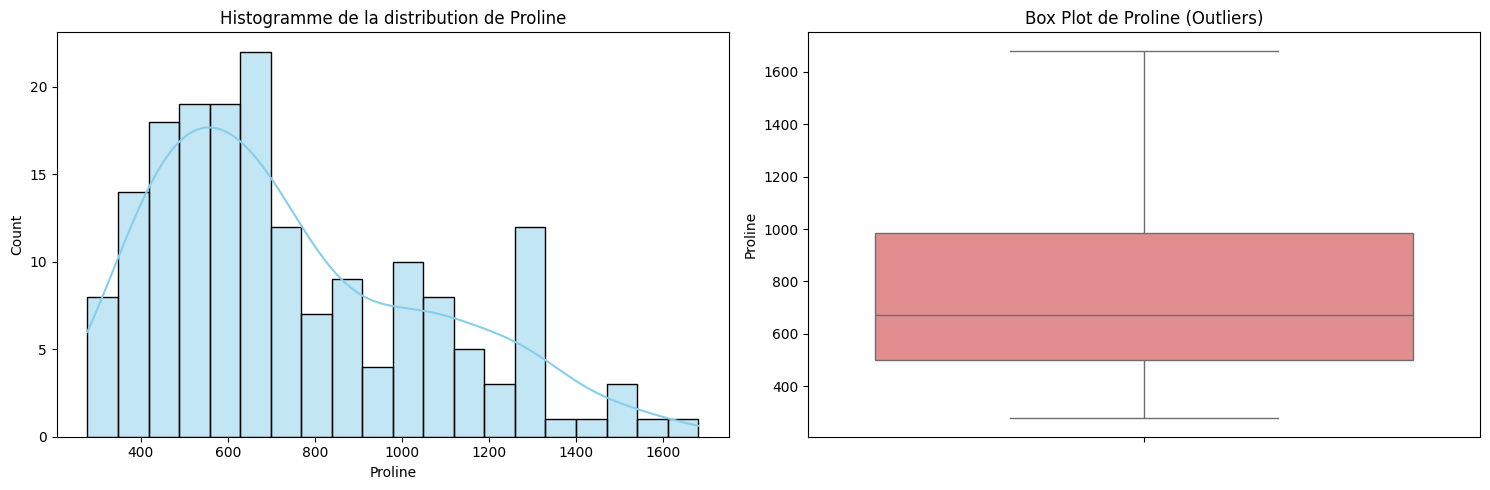

In [25]:
# Distribution des donnees pour chaque feature

import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes numériques
numerical_cols = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                  'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                  'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

# Créer des graphiques pour chaque colonne numérique
for col in numerical_cols:
    plt.figure(figsize=(15, 5))

    # Histogramme 
    plt.subplot(1, 2, 1) 
    sns.histplot(data=df, x=col, kde=True, bins=20, color='skyblue')
    plt.title(f'Histogramme de la distribution de {col}')
    plt.xlabel(col)

    # Box Plot (pour les outliers)
    plt.subplot(1, 2, 2) 
    sns.boxplot(data=df, y=col, color='lightcoral')
    plt.title(f'Box Plot de {col} (Outliers)')
    plt.ylabel(col)

    plt.tight_layout() 
    plt.show()

In [33]:
# discrétisation par intervalles egales 
import numpy as np

# nombre d'intervalles et labels des intervalles
nb_groupes = 3
labels = ['Faible', 'Moyen', 'Élevé']

for col in numerical_cols:
    print(f"\n--- Analyse de la discrétisation pour : {col} ---")
    
    try:
        # 1. Effectuer la discrétisation par quantiles 
        qcut_result = pd.qcut(
            df[col],
            q=nb_groupes,
            duplicates='drop',
            retbins=True 
        )
        
        discretized_series = qcut_result[0]
        bins = qcut_result[1]
        
        # DataFrame en utilisant les labels
        df[col + '_Groupe'] = pd.qcut(
            df[col],
            q=nb_groupes,
            labels=labels,
            duplicates='drop'
        )

        print(f"Intervalles numériques réels (Seuils): {bins}")
        print(f"Correspondance des Groupes :")
        
        print(discretized_series.value_counts().sort_index())
        
        print(f"\nDistribution par étiquette Faible/Moyen/Élevé :")
        print(df[col + '_Groupe'].value_counts().sort_index())


    except ValueError as e:
        print(f"Erreur: Impossible de créer {nb_groupes} groupes pour {col}. (Peut-être pas assez de valeurs distinctes).")
        # On peut gérer ici le passage à q=2 si l'erreur se produit
        pass


--- Analyse de la discrétisation pour : Alcohol ---
Intervalles numériques réels (Seuils): [11.03       12.51666667 13.48       14.83      ]
Correspondance des Groupes :
Alcohol
(11.029, 12.517]    59
(12.517, 13.48]     60
(13.48, 14.83]      58
Name: count, dtype: int64

Distribution par étiquette Faible/Moyen/Élevé :
Alcohol_Groupe
Faible    59
Moyen     60
Élevé     58
Name: count, dtype: int64

--- Analyse de la discrétisation pour : Malicacid ---
Intervalles numériques réels (Seuils): [0.74       1.67       2.55333333 5.8       ]
Correspondance des Groupes :
Malicacid
(0.739, 1.67]    60
(1.67, 2.553]    58
(2.553, 5.8]     59
Name: count, dtype: int64

Distribution par étiquette Faible/Moyen/Élevé :
Malicacid_Groupe
Faible    60
Moyen     58
Élevé     59
Name: count, dtype: int64

--- Analyse de la discrétisation pour : Ash ---
Intervalles numériques réels (Seuils): [1.36       2.27666667 2.48       3.23      ]
Correspondance des Groupes :
Ash
(1.3590000000000002, 2.277]    59
